In [1]:
import os
import numpy as np
from ncempy.io import dm
import tifffile as tiff
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import pandas as pd


Processing Amplitude (Lorentzian 1).dm4...
Saved C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\101\radial\A\2\Amplitude (Lorentzian 1).tif


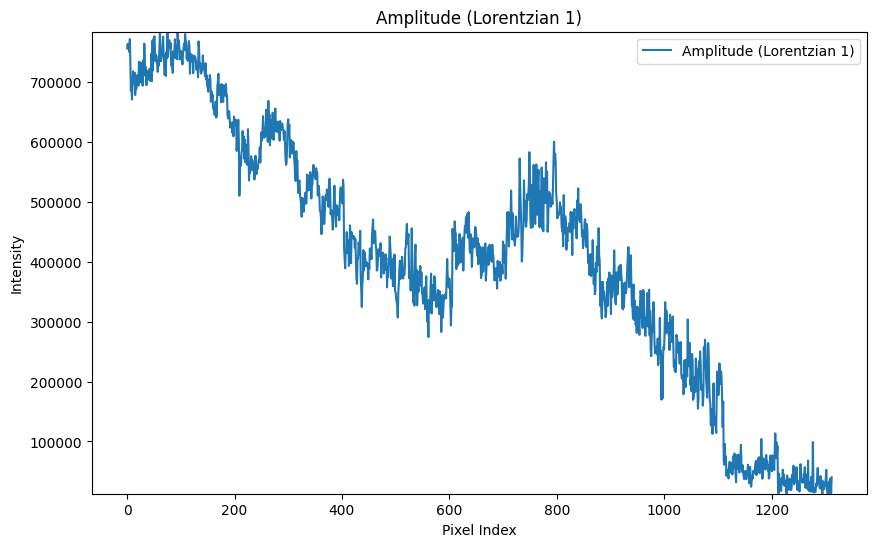

Processing FWHM (Lorentzian 1).dm4...
Saved C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\101\radial\A\2\FWHM (Lorentzian 1).tif


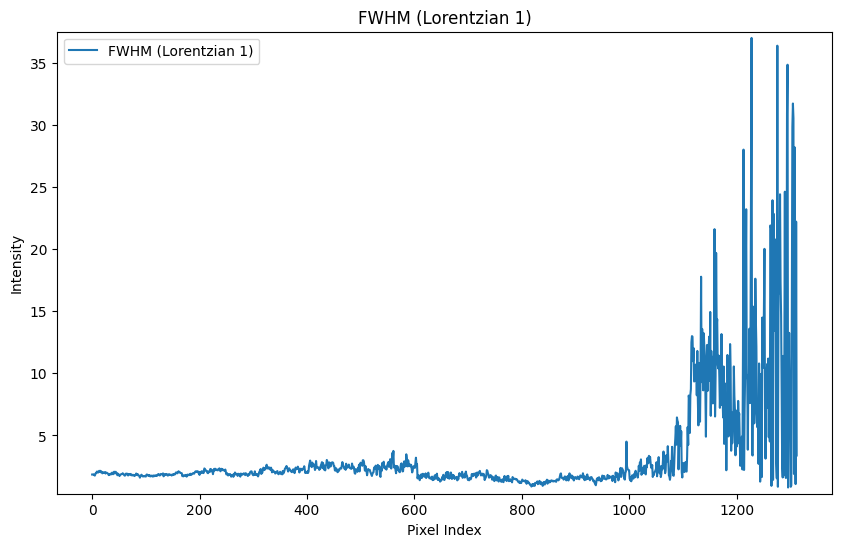

Processing Position (Lorentzian 1).dm4...
Saved C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\101\radial\A\2\Position (Lorentzian 1).tif


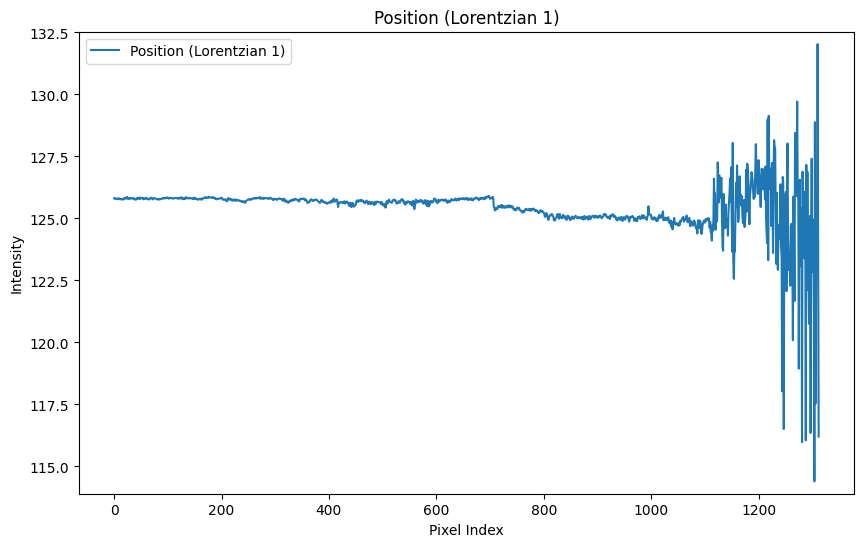

First column intensity data from all TIFF files saved to C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\101\radial\A\2\101_radial_A2 information.xlsx


In [20]:
# 입력 폴더와 출력 폴더 경로
input_folder = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\101\radial\A\2\dm4"
output_folder = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\101\radial\A\2"

# 출력 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 빈 DataFrame 생성
all_data = pd.DataFrame()

# 플롯팅 함수 정의
def plot_first_column_intensity(data, title):
    plt.figure(figsize=(10, 6))
    x = np.arange(data.shape[0])
    plt.plot(x, data, label=title)
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.title(f'{title}')
    plt.legend()
    plt.ylim(data.min() - 0.5, data.max() + 0.5)
    plt.show()

# 입력 폴더 내 모든 DM4 파일에 대해 작업 수행
for filename in os.listdir(input_folder):
    if filename.endswith('.dm4'):
        input_dm4_file = os.path.join(input_folder, filename)
        output_tiff_file = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}.tif')

        # DM4 파일 읽기
        dm4_data = dm.fileDM(input_dm4_file)

        # DM4 데이터 내용 확인
        print(f"Processing {filename}...")

        # 데이터셋 이름을 사용하여 데이터 추출
        try:
            dataset = dm4_data.getDataset(0)  # 첫 번째 데이터셋 접근
            image_data = dataset['data']      # 데이터 추출

            # TIFF 파일로 저장 (스케일 적용)
            if 'amplitude' in filename:
                scaled_image_data = image_data.astype(np.float32)
            elif 'fwhm' in filename:
                scaled_image_data = (image_data).astype(np.float32)
                print(f"fwhm scaling applied: min={scaled_image_data.min()}, max={scaled_image_data.max()}")
            elif 'position' in filename:
                scaled_image_data = (image_data).astype(np.float32)
                print(f"position scaling applied: min={scaled_image_data.min()}, max={scaled_image_data.max()}")
            else:
                scaled_image_data = image_data.astype(np.float32)  # Default to no scaling if not identified

            tiff.imwrite(output_tiff_file, scaled_image_data, photometric='minisblack')
            print(f"Saved {output_tiff_file}")

            # TIFF 파일 열기
            image = imageio.imread(output_tiff_file)

            # 첫 번째 열의 intensity 값 추출
            first_column_intensity = image[:, 0]

            # 파일 이름에서 기본 이름 추출
            base_name = os.path.basename(output_tiff_file).split('.')[0]

            # pandas DataFrame으로 변환
            df = pd.DataFrame(first_column_intensity, columns=[base_name])

            # 데이터를 병합
            if all_data.empty:
                all_data = df
            else:
                all_data = pd.concat([all_data, df], axis=1)

            # 각 파일의 데이터를 개별적으로 플로팅
            plot_first_column_intensity(first_column_intensity, base_name)

        except Exception as e:
            print(f"Failed to process {filename}: {e}")

# Excel 파일로 저장
excel_file = os.path.join(output_folder, '101_radial_A2 information.xlsx')
all_data.to_excel(excel_file, index=False)

# 확인 메세지 출력
print(f'First column intensity data from all TIFF files saved to {excel_file}')


In [2]:
import os
import numpy as np
from ncempy.io import dm
import tifffile as tiff

# 입력 폴더와 출력 폴더 경로
input_folder = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\radial\1\dm4"
output_folder = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\radial\1"
# 출력 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 입력 폴더 내 모든 DM4 파일에 대해 작업 수행
for filename in os.listdir(input_folder):
    if filename.endswith('.dm4'):
        input_dm4_file = os.path.join(input_folder, filename)
        output_tiff_file = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}.tif')

        # DM4 파일 읽기
        dm4_data = dm.fileDM(input_dm4_file)

        # DM4 데이터 내용 확인
        print(f"Processing {filename}...")

        # 모든 메타데이터와 키를 출력하여 구조 파악
        dm4_metadata = dm4_data.allTags
        for key, value in dm4_metadata.items():
            print(f"{key}: {value}")

        # 데이터셋 이름을 사용하여 데이터 추출
        try:
            dataset = dm4_data.getDataset(0)  # 첫 번째 데이터셋 접근
            image_data = dataset['data']      # 데이터 추출

            # TIFF 파일로 저장 (그레이 스케일)
            tiff.imwrite(output_tiff_file, image_data.astype(np.float32), photometric='minisblack')
            print(f"Saved {output_tiff_file}")

        except Exception as e:
            print(f"Failed to process {filename}: {e}")

print("모든 DM4 파일이 TIFF 파일로 성공적으로 변환되었습니다.")


Processing Amplitude (Lorentzian 1).dm4...
.ApplicationBounds: [   0.    0.  907. 1982.]
.BackgroundColor: [-2571. -2571. -1286.]
.DocumentObjectList.1.AnnotationGroupList.1.AnnotationType: 13
.DocumentObjectList.1.AnnotationGroupList.1.BackgroundColor: [-1. -1. -1.]
.DocumentObjectList.1.AnnotationGroupList.1.BackgroundMode: 2
.DocumentObjectList.1.AnnotationGroupList.1.FillMode: 2
.DocumentObjectList.1.AnnotationGroupList.1.FixedPoint: [0. 0.]
.DocumentObjectList.1.AnnotationGroupList.1.ForegroundColor: [-1. -1.  0.]
.DocumentObjectList.1.AnnotationGroupList.1.HasBackground: 0
.DocumentObjectList.1.AnnotationGroupList.1.IsMoveable: 1
.DocumentObjectList.1.AnnotationGroupList.1.IsResizable: 1
.DocumentObjectList.1.AnnotationGroupList.1.IsSelectable: 1
.DocumentObjectList.1.AnnotationGroupList.1.IsTransferrable: 1
.DocumentObjectList.1.AnnotationGroupList.1.IsTranslatable: 1
.DocumentObjectList.1.AnnotationGroupList.1.IsVisible: 1
.DocumentObjectList.1.AnnotationGroupList.1.ObjectTags.

In [9]:
import os
import shutil
import numpy as np
import tifffile as tiff

def process_tif_files(src_folder, dst_folder):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)

    # Check if the path contains 'radial' or 'angular'
    if 'radial' in src_folder.lower():
        factor = 2.96 / 160
    elif 'angular' in src_folder.lower():
        factor = 360 / 1024
    else:
        factor = None

    for filename in os.listdir(src_folder):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            src_path = os.path.join(src_folder, filename)
            dst_path = os.path.join(dst_folder, filename)
            
            if factor is not None and ('position' in filename.lower() or 'fwhm' in filename.lower()):
                # Read the TIFF file
                image = tiff.imread(src_path)
                
                # Process the image
                processed_image = image * factor
                
                # Save the processed image
                tiff.imwrite(dst_path, processed_image.astype(image.dtype))
            else:
                # Copy the original file
                shutil.copy2(src_path, dst_path)

# Example usage
src_folder = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\angular\1"
dst_folder = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\angular\1\adjusted"
process_tif_files(src_folder, dst_folder)


In [ ]:
import imageio.v2 as imageio
import numpy as np
import pandas as pd
import glob
import os

# TIFF 파일이 저장된 폴더 경로
folder_path = r"D:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\radial\1\adjusted"

# 폴더 내 모든 TIFF 파일 경로 가져오기
tif_files = glob.glob(os.path.join(folder_path, '*.tif'))

# 빈 DataFrame 생성
all_data = pd.DataFrame()

# 모든 TIFF 파일에 대해 작업 수행
for file in tif_files:
    # TIFF 파일 열기
    image = imageio.imread(file)
    
    # 첫 번째 열의 intensity 값 추출
    first_column_intensity = image[:, 0]
    
    # 파일 이름에서 기본 이름 추출
    base_name = os.path.basename(file).split('.')[0]
    
    # pandas DataFrame으로 변환
    df = pd.DataFrame(first_column_intensity, columns=[base_name])
    
    # 데이터를 병합
    if all_data.empty:
        all_data = df
    else:
        all_data = pd.concat([all_data, df], axis=1)

# Excel 파일로 저장
excel_file = r"D:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\radial\1\ring information.xlsx"
all_data.to_excel(excel_file, index=False)

# 확인 메세지 출력
print(f'First column intensity data from all TIFF files saved to {excel_file}')


In [11]:
import imageio.v2 as imageio
import numpy as np
import pandas as pd
import glob
import os

# TIFF 파일이 저장된 폴더 경로
folder_path = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\radial\1\adjusted"

# 폴더 내 모든 TIFF 파일 경로 가져오기
tif_files = glob.glob(os.path.join(folder_path, '*.tif'))

# 빈 DataFrame 생성
all_data = pd.DataFrame()

# 모든 TIFF 파일에 대해 작업 수행
for file in tif_files:
    # TIFF 파일 열기
    image = imageio.imread(file)
    
    # 첫 번째 열의 intensity 값 추출
    first_column_intensity = image[:, 0]
    
    # 파일 이름에서 기본 이름 추출
    base_name = os.path.basename(file).split('.')[0]
    
    # pandas DataFrame으로 변환
    df = pd.DataFrame(first_column_intensity, columns=[base_name])
    
    # 데이터를 병합
    if all_data.empty:
        all_data = df
    else:
        all_data = pd.concat([all_data, df], axis=1)

# 엑셀 파일 저장 경로 설정
parent_folder = os.path.dirname(folder_path)  # 상위 폴더 경로
folder_parts = parent_folder.split(os.sep)  # 폴더 경로를 분할하여 리스트로 저장
excel_filename = '_'.join(folder_parts[-3:]) + '.xlsx'  # 파일 이름 생성
excel_file = os.path.join(parent_folder, excel_filename)  # 전체 파일 경로

# Excel 파일로 저장
all_data.to_excel(excel_file, index=False)

# 확인 메세지 출력
print(f'First column intensity data from all TIFF files saved to {excel_file}')


First column intensity data from all TIFF files saved to C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\radial\1\200_radial_1.xlsx


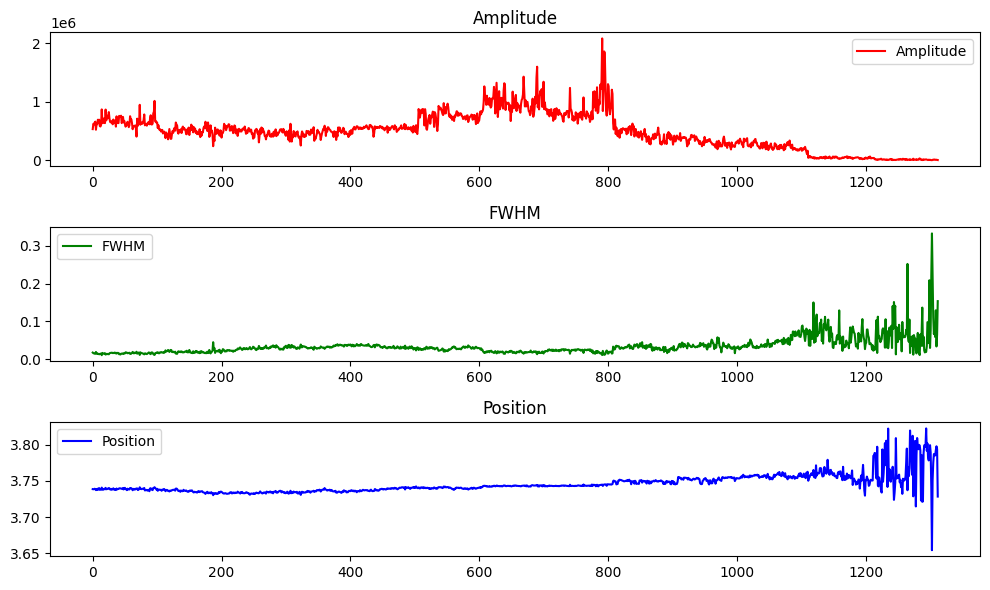

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 경로
excel_file = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\radial\1\200_radial_1.xlsx"

# 엑셀 파일 읽기
data = pd.read_excel(excel_file)

# 필요한 컬럼 추출
amplitude = data['Amplitude (Lorentzian 1)']
FWHM = data['FWHM (Lorentzian 1)']
position = data['Position (Lorentzian 1)']

# 그래프 플롯
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(amplitude, 'r', label='Amplitude')
plt.title('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(FWHM, 'g', label='FWHM')
plt.title('FWHM')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(position, 'b', label='Position')
plt.title('Position')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# 엑셀 파일 경로
excel_file = r"C:\Users\doyeob\Desktop\3layerBP data\fitting using gatan\200\radial\1\200_radial_1.xlsx"

# 엑셀 파일 읽기
data = pd.read_excel(excel_file)

# 컬럼 이름 출력
print(data.columns)


Index(['Amplitude (Lorentzian 1)', 'FWHM (Lorentzian 1)',
       'Position (Lorentzian 1)'],
      dtype='object')
